## Targetweight = sum of all cweights


In [11]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

###############
# User inputs #
###############

# Initial number of NFTs for each category
initial_nft_supply = {
    'expert': {'NFT1': 10, 'NFT2': 10},
    'graduate': {'NFT1': 10, 'NFT2': 10},
    'student': {'NFT1': 10, 'NFT2': 10}
}

# Initial weight of NFTs for each category
nft_score = {
    'expert': {'NFT1': 1, 'NFT2': 1},
    'graduate': {'NFT1': 1, 'NFT2': 1},
    'student': {'NFT1': 1, 'NFT2': 1}
}

# NFT supply to be added per iteration
### CAN CURRENTLY ONLY INCREMENT EXPERT NFT1 ###
supply_updates = {
    'expert': {'NFT1': 1, 'NFT2': 0},
    'graduate': {'NFT1': 0, 'NFT2': 0},
    'student': {'NFT1': 0, 'NFT2': 0}
}

# The max difference and the NFT to add to
max_diff = 10
addition_category= 'expert'
addition_nft = 'NFT1'

colors = {'expert': 'blue', 'graduate': 'green', 'student': 'red'}
line_styles = {'NFT1': '--', 'NFT2': ':'}

##################################
## Store the evolution of values #
##################################
# Max iterations
iterations = (max_diff * 2) + 1

# Copy of nft_supply for use in calculations
nft_supply = copy.deepcopy(initial_nft_supply)
nft_supply[addition_category][addition_nft] -= max_diff

# Initialize lists to store simulation results
target_weights = []
total_amounts = defaultdict(list)
category_weights = defaultdict(list)
multipliers = defaultdict(list)

# Initialize nested defaultdicts for NFT tracking
distance = []
nft_weights = defaultdict(lambda: defaultdict(list))
nft_weight_increases = defaultdict(lambda: defaultdict(list))

################
## Simulation ##
################

# Simulation over iterations
for i in range(iterations):
    # Increase the number of NFTs and store the sum
    for category in nft_supply:
        for nft_type in nft_supply[category]:
            # Test if first round, if so don't increment
            if i != 0:
                nft_supply[category][nft_type] += supply_updates[category][nft_type]

    # Store distance
    value = nft_supply[addition_category][addition_nft] - initial_nft_supply[addition_category][addition_nft]
    distance.append(value)

    # Calculate and store category weights
    category_weight = {}
    for category in nft_supply:
        total = 0
        for nft_type in nft_supply[category]:
          total += nft_supply[category][nft_type] * nft_score[category][nft_type]
        category_weight[category] = total
        # Store weight
        category_weights[category].append(total)

    # Calculate and store target weight
    target_weight = category_weight['expert'] + category_weight['graduate'] + category_weight['student']
    target_weights.append(target_weight)

    # Calculate and store total amounts per category
    for category in nft_supply:
        total = sum(nft_supply[category].values())
        total_amounts[category].append(total)

    # Calculate multipliers and new NFT weights
    for category in nft_supply:
        if category_weight[category] != 0:
            multiplier = target_weight / category_weight[category]
        else:
            multiplier = target_weight # changed float('inf') to = target_weight for clarity
        multipliers[category].append(multiplier)

        # Update NFT weights based on multiplier
        for nft_type in nft_score[category]:
            new_weight = nft_score[category][nft_type] * multiplier
            nft_weights[category][nft_type].append(new_weight)

            if i != 0:
              diff = new_weight - nft_weights[category][nft_type][-2]
              nft_weight_increases[category][nft_type].append(diff)


## Results Verification

In [12]:
##################
## Verification ##
##################

for i in [0, iterations // 2, iterations - 1]:
    print(f"\nIteration {i}:")
    print("Target Weight:", target_weights[i])

    print("Total Supplies:")
    for category in total_amounts:
        print(f"  {category}: {total_amounts[category][i]}")
    print("Category Weights:")
    for category in category_weights:
        print(f"  {category}: {category_weights[category][i]}")
    print("Multipliers:")
    for category in multipliers:
        print(f"  {category}: {multipliers[category][i]}")

    for category in multipliers:
        if(category_weights[category][i] * multipliers[category][i] == target_weights[i]):
            print("SUCESSS")
        else:
            print("FAILURE")

        print(f"{category_weights[category][i]} * {multipliers[category][i]} = {target_weights[i]}")



Iteration 0:
Target Weight: 50
Total Supplies:
  expert: 10
  graduate: 20
  student: 20
Category Weights:
  expert: 10
  graduate: 20
  student: 20
Multipliers:
  expert: 5.0
  graduate: 2.5
  student: 2.5
SUCESSS
10 * 5.0 = 50
SUCESSS
20 * 2.5 = 50
SUCESSS
20 * 2.5 = 50

Iteration 10:
Target Weight: 60
Total Supplies:
  expert: 20
  graduate: 20
  student: 20
Category Weights:
  expert: 20
  graduate: 20
  student: 20
Multipliers:
  expert: 3.0
  graduate: 3.0
  student: 3.0
SUCESSS
20 * 3.0 = 60
SUCESSS
20 * 3.0 = 60
SUCESSS
20 * 3.0 = 60

Iteration 20:
Target Weight: 70
Total Supplies:
  expert: 30
  graduate: 20
  student: 20
Category Weights:
  expert: 30
  graduate: 20
  student: 20
Multipliers:
  expert: 2.3333333333333335
  graduate: 3.5
  student: 3.5
SUCESSS
30 * 2.3333333333333335 = 70
SUCESSS
20 * 3.5 = 70
SUCESSS
20 * 3.5 = 70


## Results

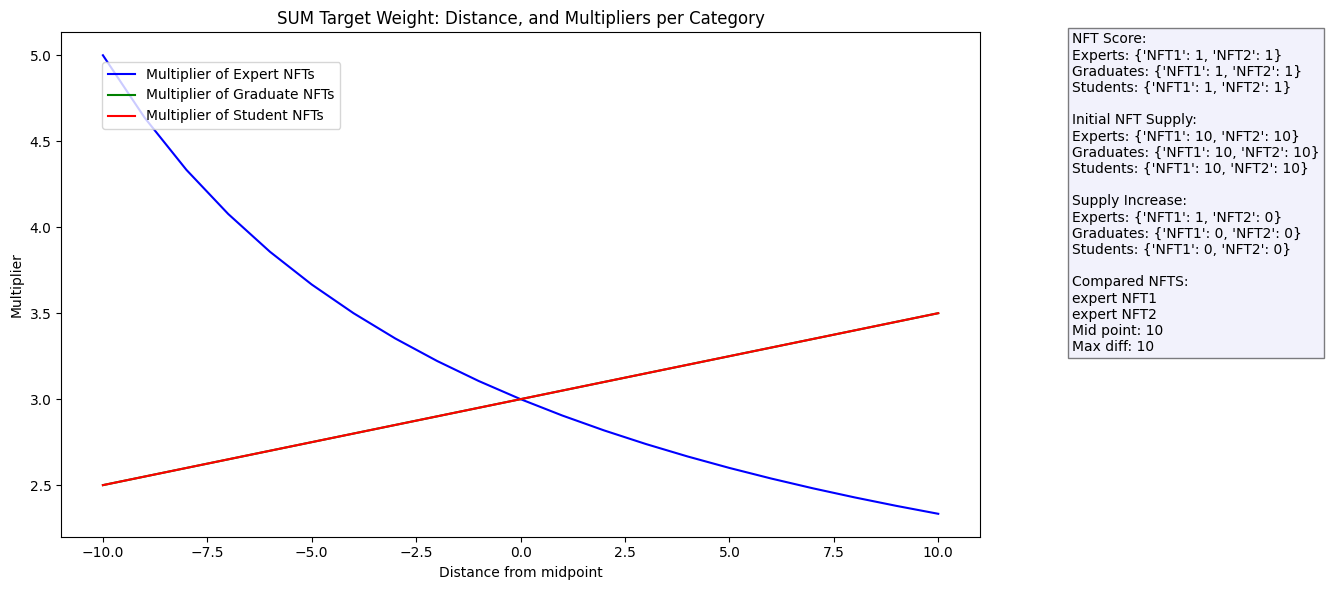

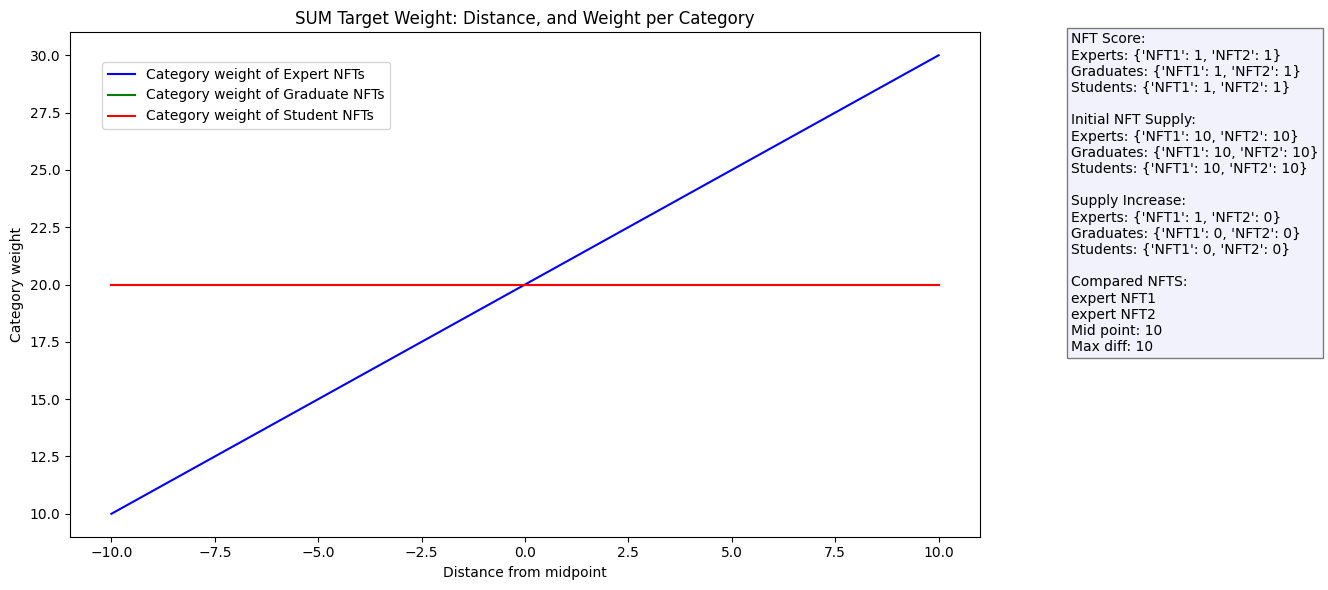

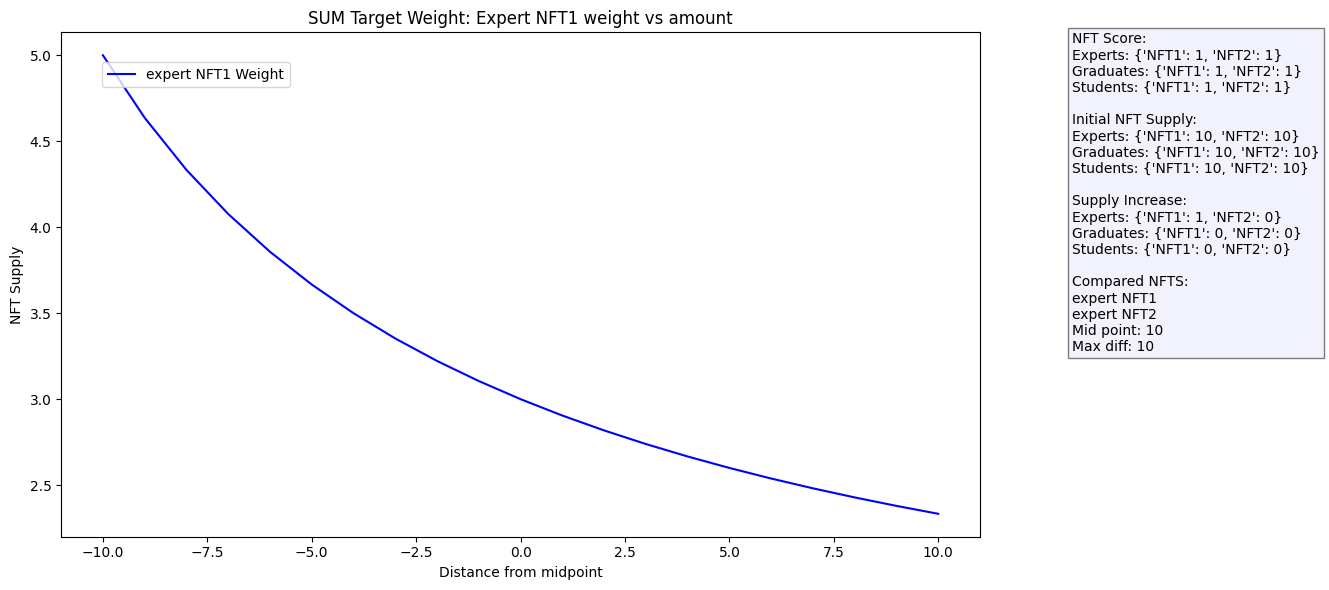

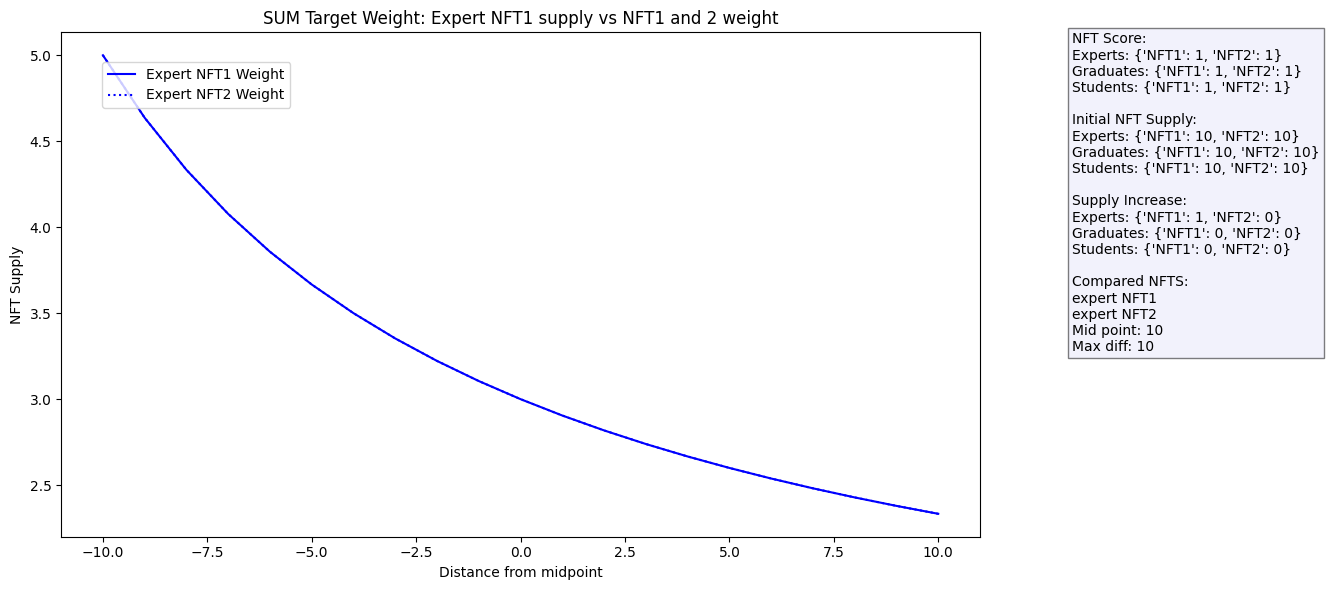

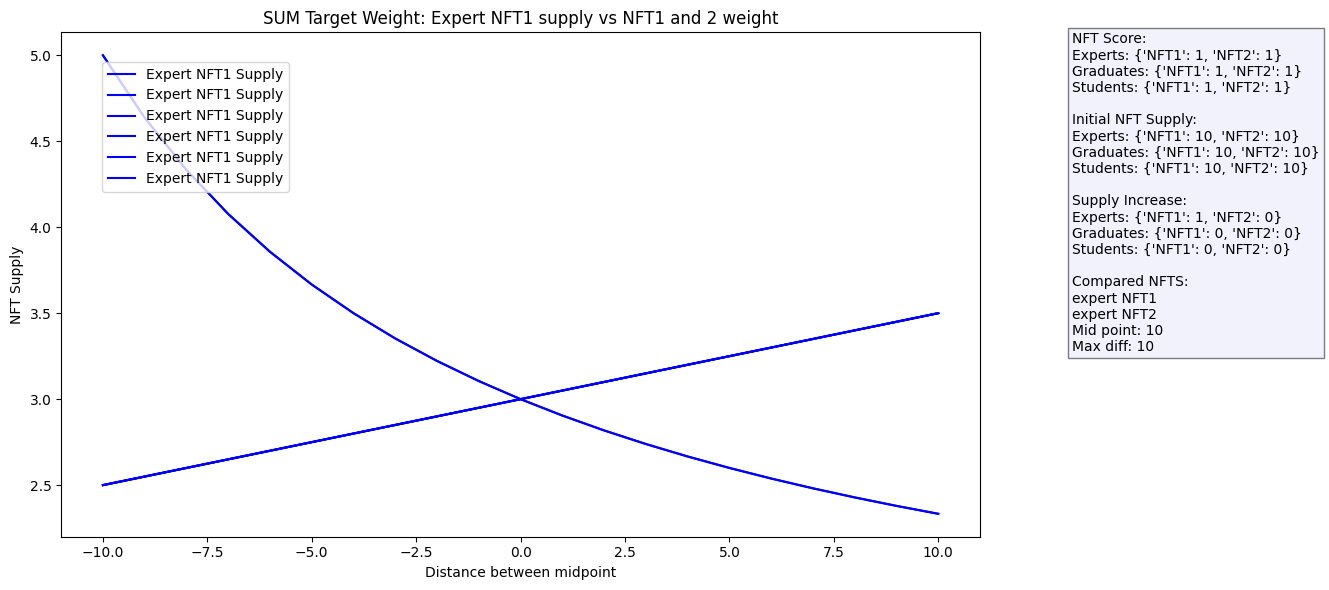

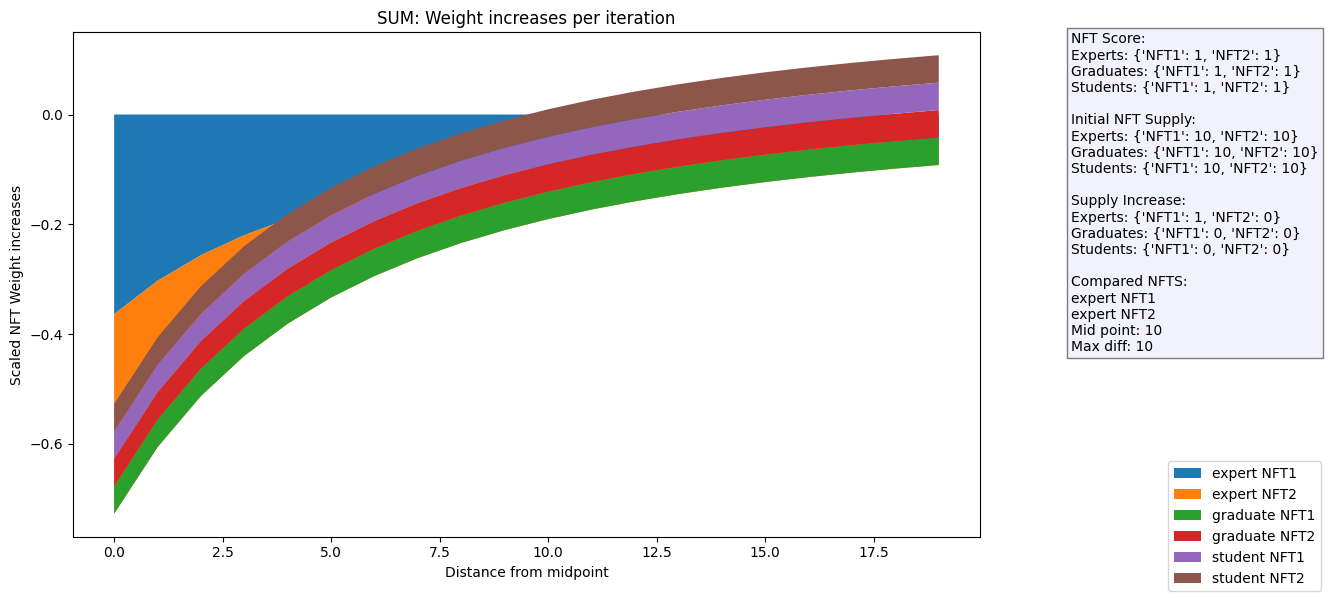

In [13]:
#############
## RESULTS ##
#############

#print("Multipliers")
#print(multipliers)
#print("Category weights")
#print(category_weights)
#print("New weights")
#print(new_nft_weights)
#print("Weight Increases")
#print(nft_weight_increases)


############
## GRAPHS ##
############

### Text box for graph clarity ###
textbox = '\n'.join([
    'NFT Score:',
    f"Experts: {nft_score['expert']}",
    f"Graduates: {nft_score['graduate']}",
    f"Students: {nft_score['student']}",
    '',
    'Initial NFT Supply:',
    f"Experts: {initial_nft_supply['expert']}",
    f"Graduates: {initial_nft_supply['graduate']}",
    f"Students: {initial_nft_supply['student']}",
    '',
    'Supply Increase:',
    f"Experts: {supply_updates['expert']}",
    f"Graduates: {supply_updates['graduate']}",
    f"Students: {supply_updates['student']}",
    '',
    'Compared NFTS: ',
    f'{addition_category} {addition_nft}',
    f'{addition_category} NFT2',
    f'Mid point: 10',
    f'Max diff: {max_diff}'
])

### Multipliers ###
# print the multiplier graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot distance vs multiplier
for category in multipliers:
    ax1.plot(distance, multipliers[category], label=f'Multiplier of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Distance from midpoint')
ax1.set_ylabel('Multiplier')
ax1.set_title('SUM Target Weight: Distance, and Multipliers per Category')

# Create the legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

### Category weights ###
# Print the category weights graphs

# Create the total weights plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
for category in category_weights:
    ax1.plot(distance, category_weights[category], label=f'Category weight of {category.capitalize()} NFTs', color=colors[category])

# Set labels for the primary y-axis
ax1.set_xlabel('Distance from midpoint')
ax1.set_ylabel('Category weight')
ax1.set_title('SUM Target Weight: Distance, and Weight per Category')

# Create legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### NFT1 distance vs NFT1 weight ####
# Print the weight and number of the NFT being changed

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(distance, nft_weights[addition_category][addition_nft], label=f'{addition_category} {addition_nft} Weight', color=colors[addition_category])

# Set labels for the primary y-axis
ax1.set_xlabel('Distance from midpoint')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Expert NFT1 weight vs amount')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### NFT1 distance vs NFT1 and NFT2 weight ####
# Print the weight and number of the NFT being changed

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
ax1.plot(distance, nft_weights['expert']['NFT1'], label='Expert NFT1 Weight', color=colors['expert'])
ax1.plot(distance, nft_weights['expert']['NFT2'], label='Expert NFT2 Weight', color=colors['expert'], linestyle=line_styles['NFT2'])

# Set labels for the primary y-axis
ax1.set_xlabel('Distance from midpoint')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Expert NFT1 supply vs NFT1 and 2 weight')

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Individual NFT weights ####
# Print the weights of all NFTs over time

# Create the individual weights plot
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

# Plot target_weight and number of NFTs on the primary y-axis (ax1)
for category in nft_weights:
    for nft_type in nft_weights[category]:
        ax1.plot(distance, nft_weights[category][nft_type], label='Expert NFT1 Supply', color=colors['expert'])

# Set labels for the primary y-axis
ax1.set_xlabel('Distance between midpoint')
ax1.set_ylabel('NFT Supply')
ax1.set_title('SUM Target Weight: Expert NFT1 supply vs NFT1 and 2 weight')

# Create legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.tight_layout()
plt.show()

#### Weight increase vs previous ####
y = []
labels = []
fig, ax1 = plt.subplots(figsize=(10, 6))

bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
fig.text(1.1, 1, textbox, fontsize=10, transform=ax1.transAxes, bbox=bbox,
verticalalignment='top')

for category in nft_weight_increases:
    for nft_type in nft_weight_increases[category]:
      y.append(nft_weight_increases[category][nft_type])
      labels.append(f"{category} {nft_type}")

ax1.stackplot(range(iterations -1), y, labels=labels)

ax1.set_xlabel('Distance from midpoint')
ax1.set_ylabel('Scaled NFT Weight increases')
ax1.set_title('SUM: Weight increases per iteration')

fig.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()